In [ ]:
# Import necessary libraries
import os
from PIL import Image
import matplotlib.pyplot as plt
import glob
4
# Import TensorFlow Keras modules
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np  # Corrected 'numpy as' to 'numpy as np'


In [ ]:
# Define the file path to the directory containing images
file_path = '/content/drive/MyDrive/women fashion'


In [ ]:
# List all files in the specified directory
def list_files(directory):
    return os.listdir(directory)

In [ ]:
# Display the first few file names and the total number of files
files = list_files(file_path)
print(files[:10], len(files))

['anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', 'fitted, short, yellow dress with short sleeves.jpeg', 'vibrant blue and a neutral tone adorned with colorful floral patterns.jpg', 'shiny purple sequined dress with a one-shoulder design.jpg', 'Latest-Party-Wear-One-Piece-Gown-For-Women.webp', 'Anarkali suit with fitted bodice with a high neckline.jpg', 'high-waisted white trousers paired with a structured, corset-style bodice featuring mesh.jpg', 'light green, short dress with lace detailing around the waist and the edges of the sleeves and hem.jpg', 'burnt orange long-sleeve top, a plaid skirt with brown tones, and a matching burnt orange beret.jpeg', 'floral dress with long sleeves.jpeg'] 97


In [ ]:
# Function to display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()

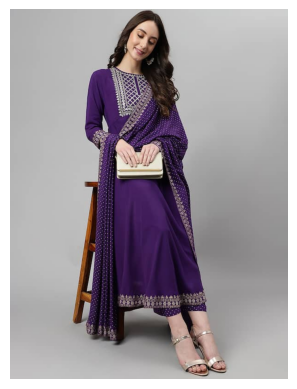

In [ ]:
# Display the first image in the directory
image_path = os.path.join(file_path, files[0])
display_image(image_path)

In [ ]:
# Function to get a list of image file paths with specific extensions
def get_image_paths(directory):
    return [file for file in glob.glob(os.path.join(directory, '*.*'))
            if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

In [ ]:
# Get the list of image paths
image_path_list = get_image_paths(file_path)
print(image_path_list)


['/content/drive/MyDrive/women fashion/anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg', '/content/drive/MyDrive/women fashion/fitted, short, yellow dress with short sleeves.jpeg', '/content/drive/MyDrive/women fashion/vibrant blue and a neutral tone adorned with colorful floral patterns.jpg', '/content/drive/MyDrive/women fashion/shiny purple sequined dress with a one-shoulder design.jpg', '/content/drive/MyDrive/women fashion/Latest-Party-Wear-One-Piece-Gown-For-Women.webp', '/content/drive/MyDrive/women fashion/Anarkali suit with fitted bodice with a high neckline.jpg', '/content/drive/MyDrive/women fashion/high-waisted white trousers paired with a structured, corset-style bodice featuring mesh.jpg', '/content/drive/MyDrive/women fashion/light green, short dress with lace detailing around the waist and the edges of the sleeves and hem.jpg', '/content/drive/MyDrive/women fashion/burnt orange long-sleeve top, a plaid skirt with brown tones, and a matchi

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)


def preprocess_image(img_path):
  img = image.load_img(img_path, target_size=(224, 224))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis = 0)
  return preprocess_input(img_array)

def extract_features(img_path):
  preprocessed_img = preprocess_image(img_path)
  features = model.predict(preprocessed_img)
  flatten_features =  features.flatten()
  normalized_features = flatten_features / np.linalg.norm(flatten_features)
  return normalized_features


all_features = []
all_image_names = []

for img_path in image_path_list:
  features = extract_features(img_path)
  all_features.append(features)
  all_image_names.append(os.path.basename(img_path))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━

In [ ]:
from scipy.spatial.distance import cosine
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt


def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # Preprocess the input image and extract features
    input_features = extract_features(input_image_path)

    # Calculate similarities using cosine distance
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]

    # Sort indices based on similarity scores
    similar_indices = np.argsort(similarities)[-top_n:]

    # Filter out the input image index from similar_indices
    input_image_name = os.path.basename(input_image_path)
    similar_indices = [idx for idx in similar_indices if all_image_names[idx] != input_image_name]

    # Display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # Display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        similar_image_path = os.path.join('/content/drive/MyDrive/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(similar_image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


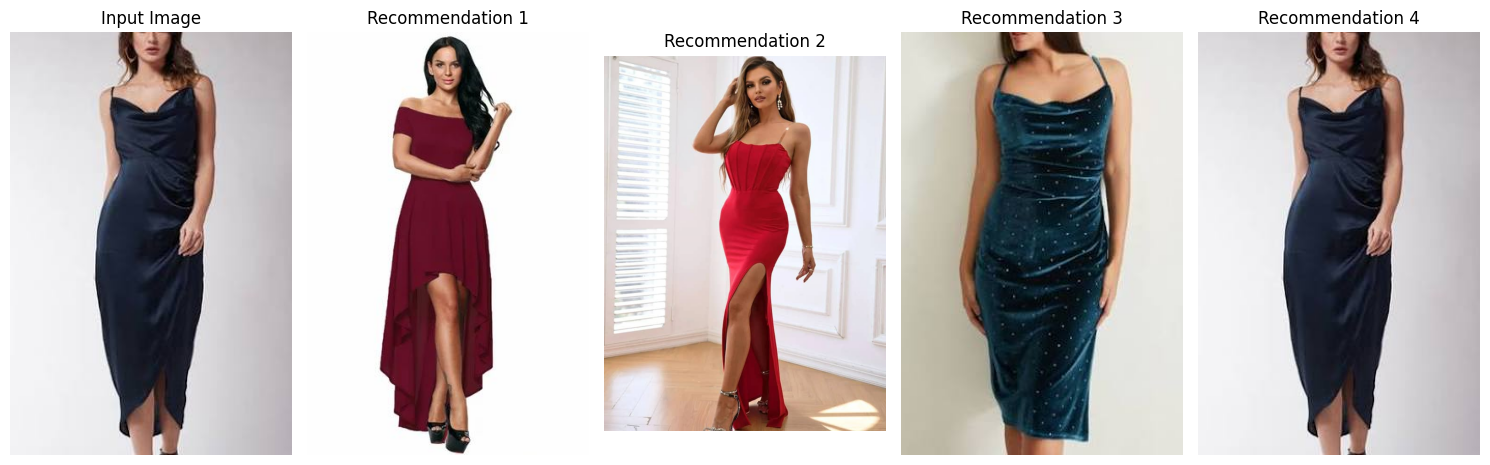

In [ ]:
input_image_path = '/content/drive/MyDrive/women fashion/dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_path_list, model, top_n=4)